<a href="https://colab.research.google.com/github/Farsana-22/Data-visualization./blob/main/heart_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/heart_health_data.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106460,No,21.63,Yes,No,No,7.0,0.0,No,Female,35-39,White,No,No,Good,7.0,No,No,No
106461,No,20.83,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,8.0,No,No,No
106462,No,27.37,No,No,No,0.0,0.0,No,Male,55-59,Black,No,Yes,Excellent,8.0,No,No,No
106463,No,27.27,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Good,6.0,No,No,No


In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
df.duplicated().sum()

2294

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.size

5756310

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## *1-KIDNEY DISEASE PERCENTAGE BREAKDOWN*


In [ ]:
kd=df['KidneyDisease'].value_counts()
kd

,count
KidneyDisease,
No,100055
Yes,4115


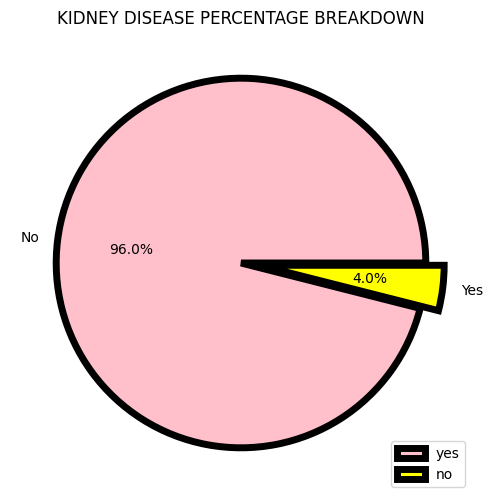

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(kd,labels=kd.index,wedgeprops={'edgecolor':'black','linewidth':5},autopct='%1.1f%%',explode=(0,0.1),colors=('pink','yellow'))
plt.title('KIDNEY DISEASE PERCENTAGE BREAKDOWN')
plt.legend(['yes','no'],loc='lower right')
plt.show()

**INSIGHT - **Majority did not have kidney disease

In [ ]:
s=df[(df['SkinCancer']=='Yes')]
sk=s['Race'].value_counts()
sk

,count
Race,
White,10073
Other,232
Hispanic,155
Black,68
American Indian/Alaskan Native,61
Asian,35


## ***2-SKIN CANCER CASES BY RACE***

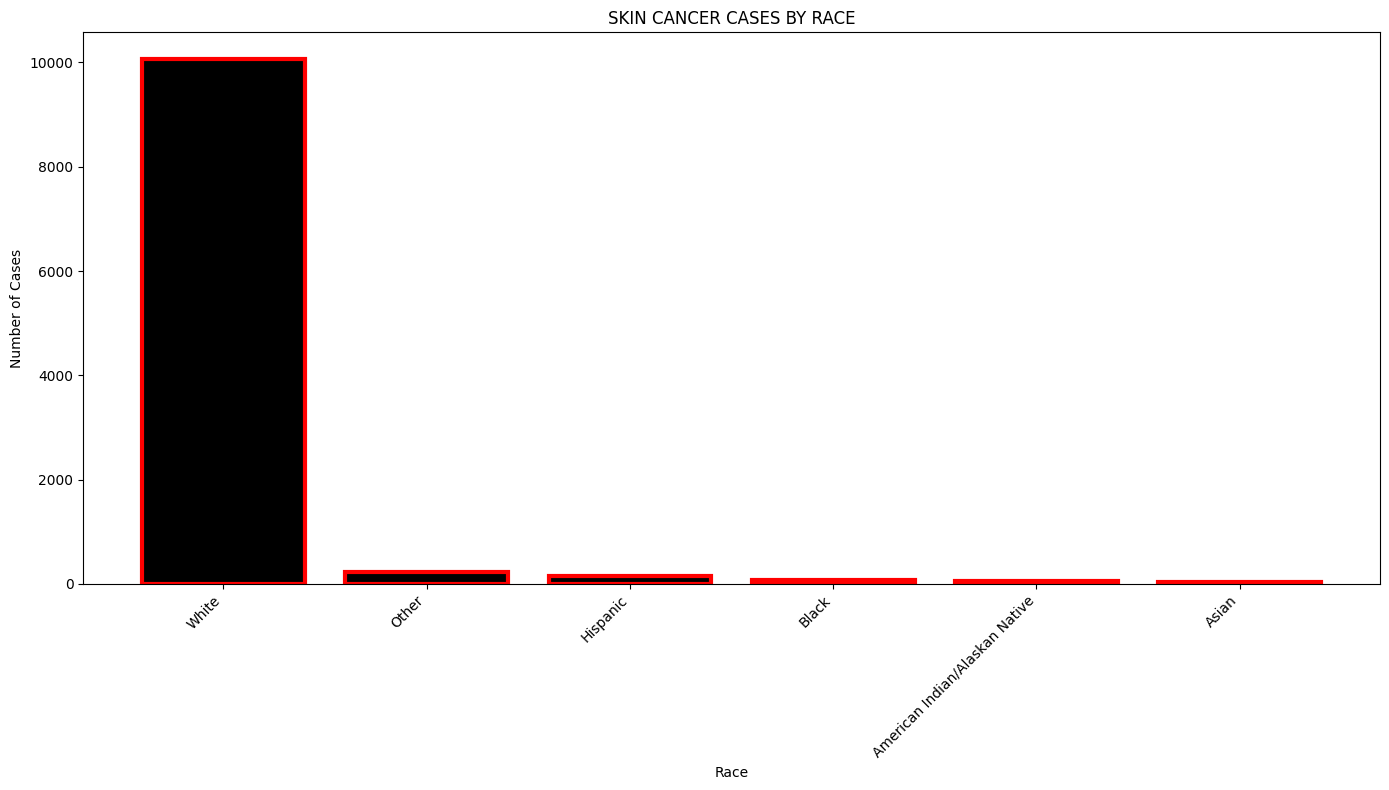

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(sk.index,sk.values,color='black',edgecolor='Red', linewidth=3)
plt.xlabel('Race')  # Adding x-axis label
plt.ylabel('Number of Cases')  # Adding y-axis label
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**INSIGHT-** Skin cancer incidence is higher among individuals with lighter skin tones.

# ***3-Countplot of Sex and Diabetic***

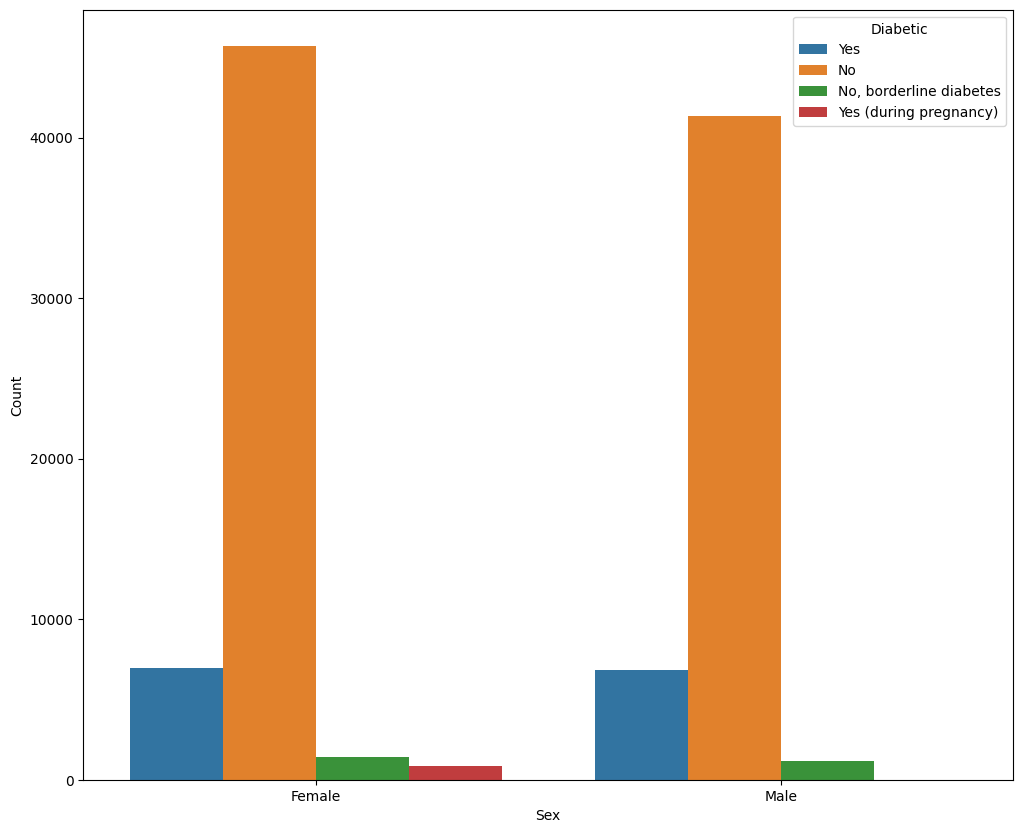

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(x='Sex', hue='Diabetic', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

**INSIGHT-** males have a higher rate of diabetes.


# ***4-kidney disease incidence across age groups***

Text(0, 0.5, 'Number of Cases')

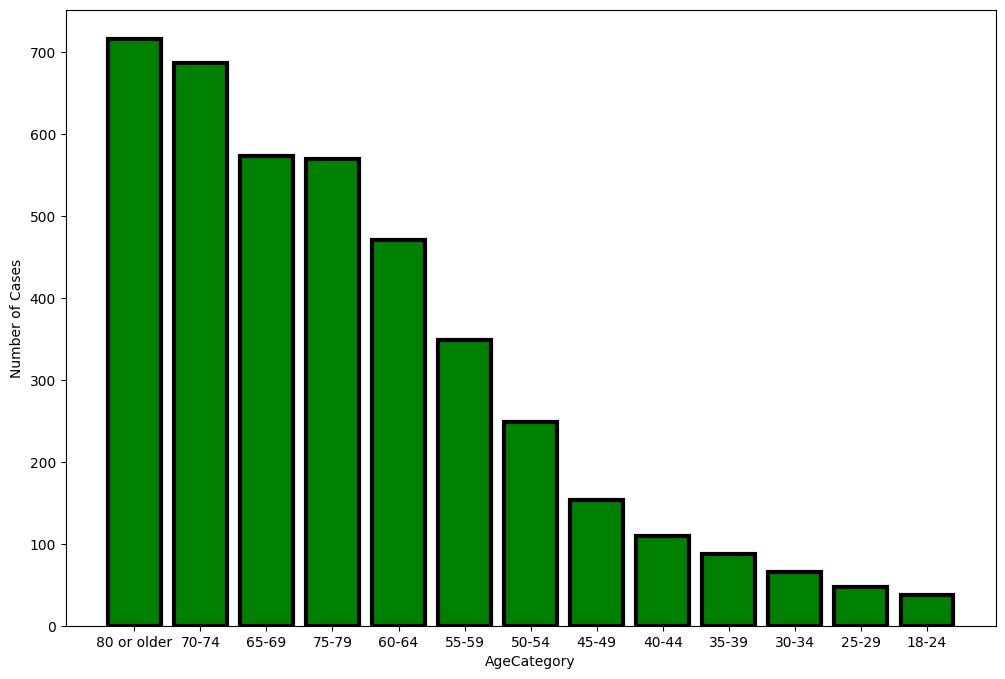

In [ ]:
plt.figure(figsize=(12,8))
k=df[(df['KidneyDisease']=='Yes')]
kd=k['AgeCategory'].value_counts()
plt.bar(kd.index,kd.values,color='green',edgecolor='black', linewidth=3)
plt.xlabel('AgeCategory')
plt.ylabel('Number of Cases')
plt.show()

**INSIGHT-**Kidney disease is more prevalent among older age groups

## ***5-Diabetic on different sex***

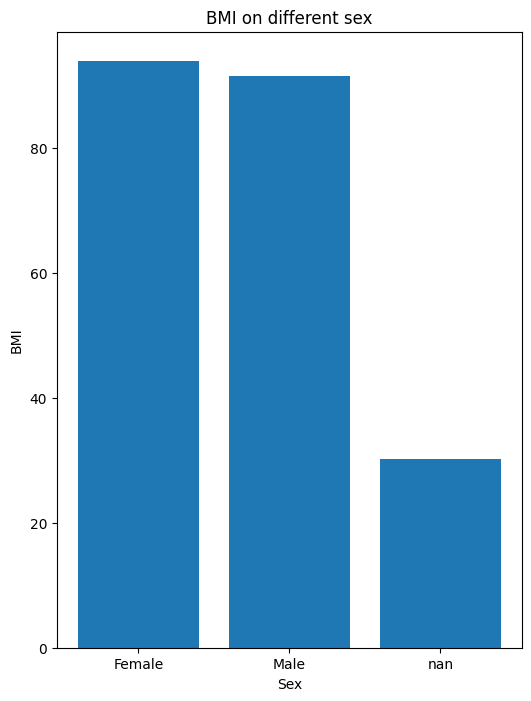

In [ ]:
plt.figure(figsize=(6,8))
plt.bar(df['Sex'].astype('str'),df['BMI'])
plt.title('BMI on different sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

**INSIGHT-**BMI level is higher in females.

## ***6- High-Risk Individuals with Multiple Health Conditions***

In [ ]:
filtered_df = df[(df['HeartDisease'] == 'Yes')&(df['KidneyDisease']=='Yes')&(df['Asthma']=='Yes')&(df['Diabetic']=='Yes')]
hr=filtered_df['Sex'].value_counts()
hr


,count
Sex,
Female,96
Male,74


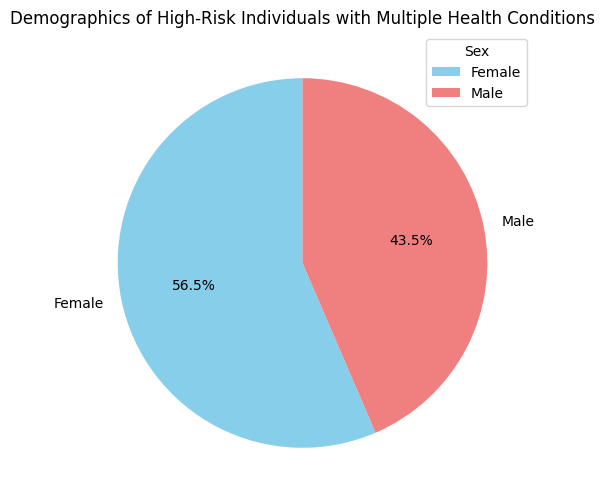

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(hr, labels=hr.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title(' High-Risk Individuals with Multiple Health Conditions')
plt.legend(title='Sex')
plt.show()

**INSIGHT-**Among high-risk individuals with multiple health conditions, females represent a larger proportion (56.5%) compared to males (43.5%).

## ***7-Freequency of alcohol drinking by sex***

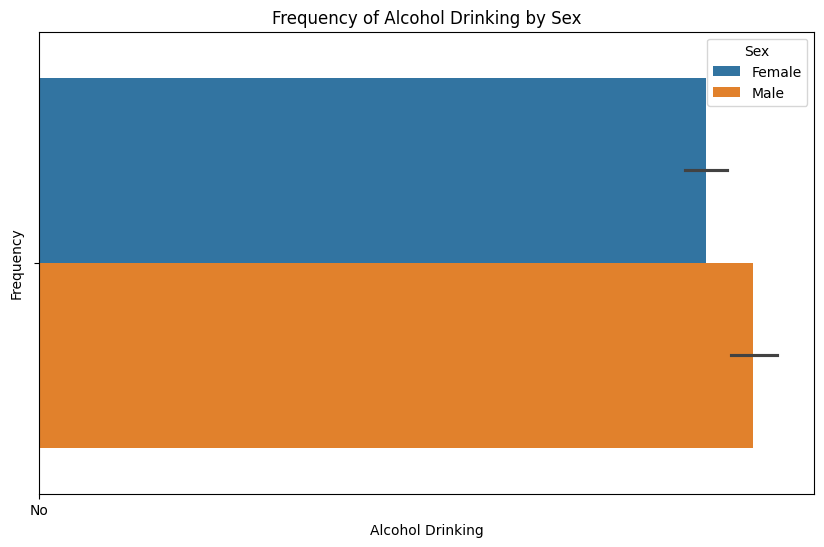

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AlcoholDrinking', hue='Sex', data=df)
plt.xlabel('Alcohol Drinking')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol Drinking by Sex')
plt.show()

**INSIGHT-**Alcahol drinking habit is higer in males.

## ***8-Freequency of BMI,PhysicalHealth,MentalHealth and SleepTime***

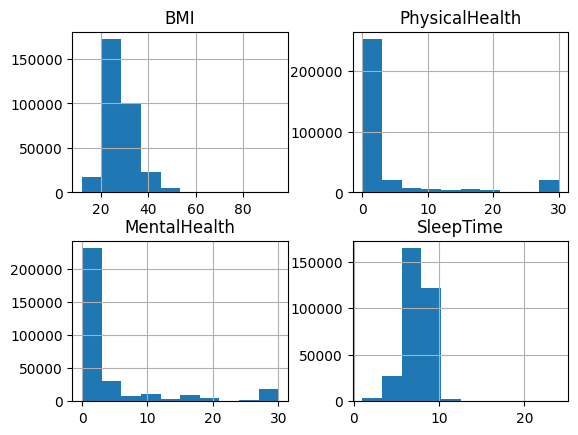

In [ ]:
df.hist()
plt.show()

## ***9-Outlier detection in BMI***

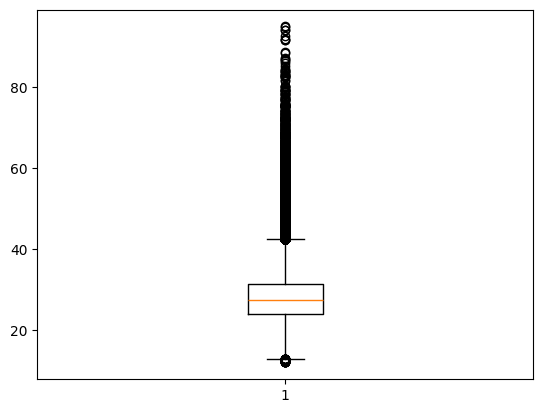

In [ ]:
plt.boxplot(df['BMI'])
plt.show()

## ***10-Outlier detection in PhysicalHealth***

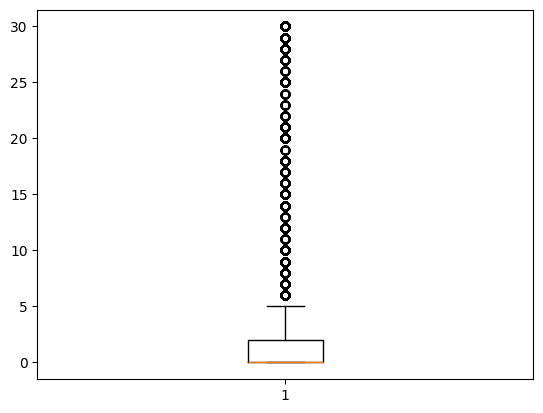

In [ ]:
plt.boxplot(df['PhysicalHealth'])
plt.show()

## ***11-PERCENTAGE BREAKDOWN OF ASTHMA PATIENTS***

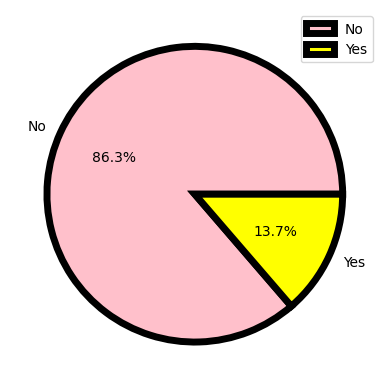

In [ ]:
#pie diagrom of alcohol drinking
plt.pie(df['Asthma'].value_counts(),labels=df['Asthma'].value_counts().index,wedgeprops={'edgecolor':'black','linewidth':5},autopct='%1.1f%%',  colors=('pink','yellow'))
plt.legend()
plt.show()

***INSIGHT-***Percentage of asthma patient is not that much higher among the data.

## ***12-count plot of heart disease***

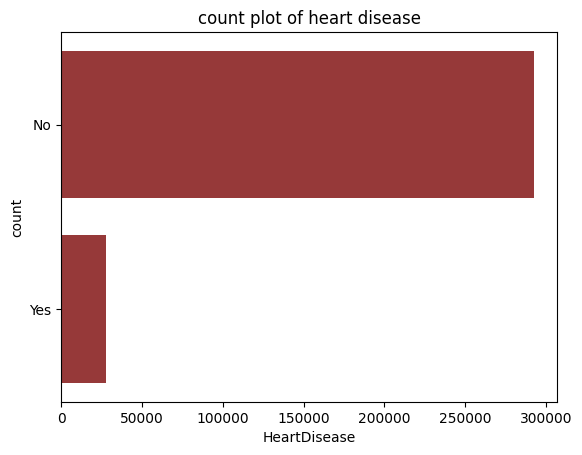

In [ ]:
sns.countplot(df['HeartDisease'],color='brown')
plt.xlabel('HeartDisease')
plt.ylabel('count')
plt.title('count plot of heart disease')
plt.show()

INSIGHT-Count of Heart disease patients is not that much higher among the data.

## *13-Effects on Mental Health due to Alcohol Drinking*

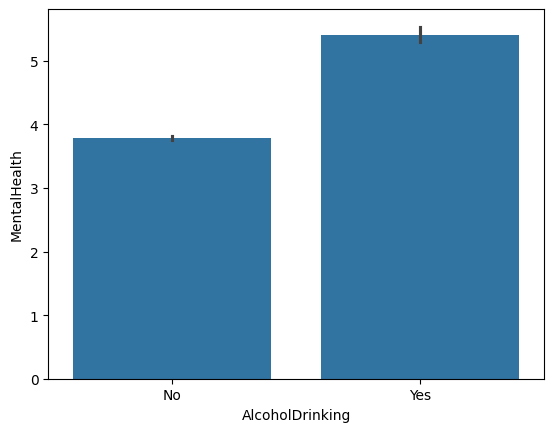

In [ ]:
sns.barplot(x=df['AlcoholDrinking'],y=df['MentalHealth'])
plt.show()

**INSIGHT-**Mental health issues are more prevalent among individuals who consume alcohol compared to non-drinkers.

## *14-Mental health of High Risk Gender with HeartDisease*

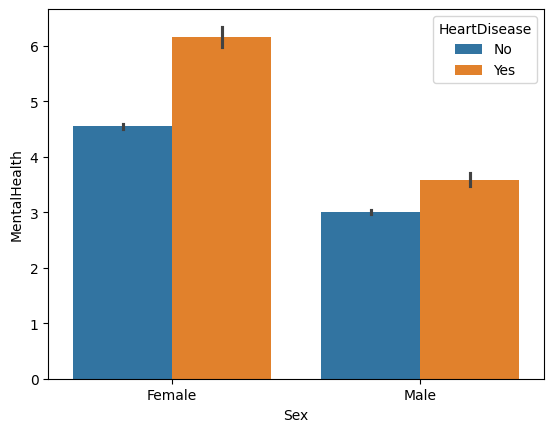

In [ ]:
sns.barplot(x=df['Sex'],y=df['MentalHealth'],hue=df['HeartDisease'])
plt.show()

**INSIGHT**- Mental health issues are higher in females with heart disease compared to males with heart disease.

## ***15-Prevalence of Kidney Disease and Smoking Habits by Sex***

In [ ]:
kd=df[(df['KidneyDisease']=='Yes')&(df['Smoking']=='Yes')]

In [ ]:
kdg=kd['Sex'].value_counts()
kdg

,count
Sex,
Female,1084
Male,999


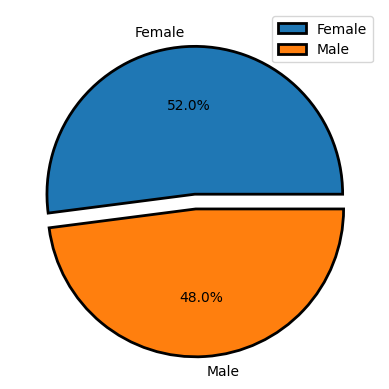

In [ ]:
plt.pie(kdg,labels=kdg.index,wedgeprops={'edgecolor':'black','linewidth':2},autopct='%1.1f%%',explode=(0,0.1))
plt.legend()
plt.show()

**INSIGHT-**Females have high rate of kidney disease with smoking habit.

### ***16-DISTRIBUTION PLOT OF PHYSICAL HEALTH AMONG HIGH RISK HEART PATIENTS***

In [ ]:
hp=df[(df['KidneyDisease']=='Yes')&(df['HeartDisease']=='Yes')&(df['Smoking']=='Yes')]
hp

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
78,Yes,28.29,Yes,No,No,30.0,30.0,No,Female,70-74,White,Yes,Yes,Poor,9.0,No,Yes,No
184,Yes,25.80,Yes,No,No,7.0,0.0,Yes,Male,80 or older,White,No,No,Fair,8.0,Yes,Yes,Yes
217,Yes,28.41,Yes,No,No,10.0,3.0,Yes,Male,65-69,White,No,Yes,Fair,7.0,No,Yes,No
258,Yes,30.83,Yes,No,No,10.0,0.0,Yes,Female,75-79,Black,No,Yes,Very good,6.0,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106288,Yes,31.89,Yes,No,No,0.0,0.0,No,Female,65-69,White,Yes,No,Fair,4.0,No,Yes,No
106337,Yes,21.31,Yes,No,No,30.0,0.0,No,Male,80 or older,White,No,No,Good,8.0,No,Yes,Yes
106426,Yes,29.26,Yes,No,No,1.0,1.0,Yes,Female,70-74,White,Yes,Yes,Good,6.0,Yes,Yes,No
106434,Yes,28.89,Yes,No,Yes,15.0,1.0,Yes,Male,80 or older,White,Yes,Yes,Poor,8.0,No,Yes,No


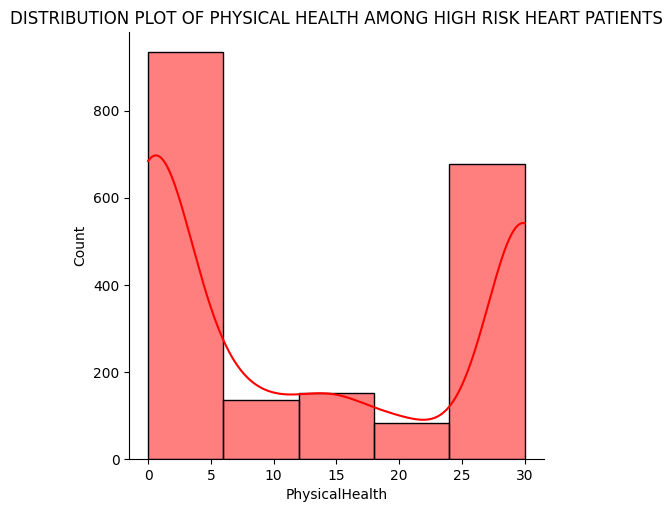

In [ ]:
sns.displot(hp['PhysicalHealth'],kde=True,bins=5,color='red')
plt.title('DISTRIBUTION PLOT OF PHYSICAL HEALTH AMONG HIGH RISK HEART PATIENTS')
plt.show()

**INSIGHT-**
The distribution plot shows a bimodal pattern of physical health days among high-risk heart patients,It shows that most high-risk heart patients report either very few (close to 0) or many (close to 30) unhealthy physical health, indicating two prominent groups in the data

## ***17-Relation between Physical Health and Mentalhealth***


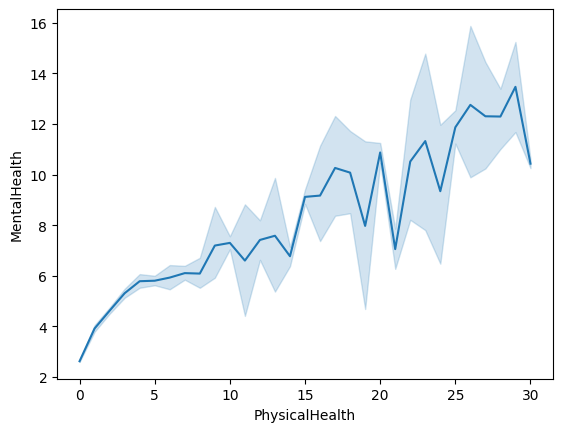

In [ ]:
sns.lineplot(x='PhysicalHealth',y='MentalHealth',data=df)
plt.show()

**INSIGHT**-There is a positive relation between physical health and mental health

## ***18-CORRELATION BETWEEN BMI,MENTALHEALTH,PHYSICALHEALTH AND SLEEPTIME IN DIABETIC PATIENTS***

In [ ]:
x=df.select_dtypes(include='number')
x

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [ ]:
x.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


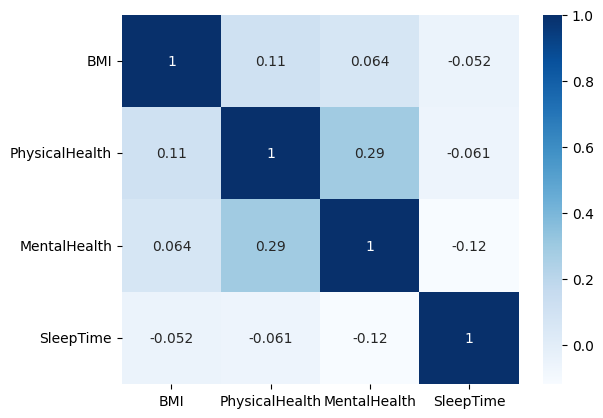

In [ ]:
sns.heatmap(x.corr(),annot=True,cmap='Blues')
plt.show()

**INSIGHT**- The strongest correlation is between PhysicalHealth and MentalHealth (0.29), while all other correlations are weak.

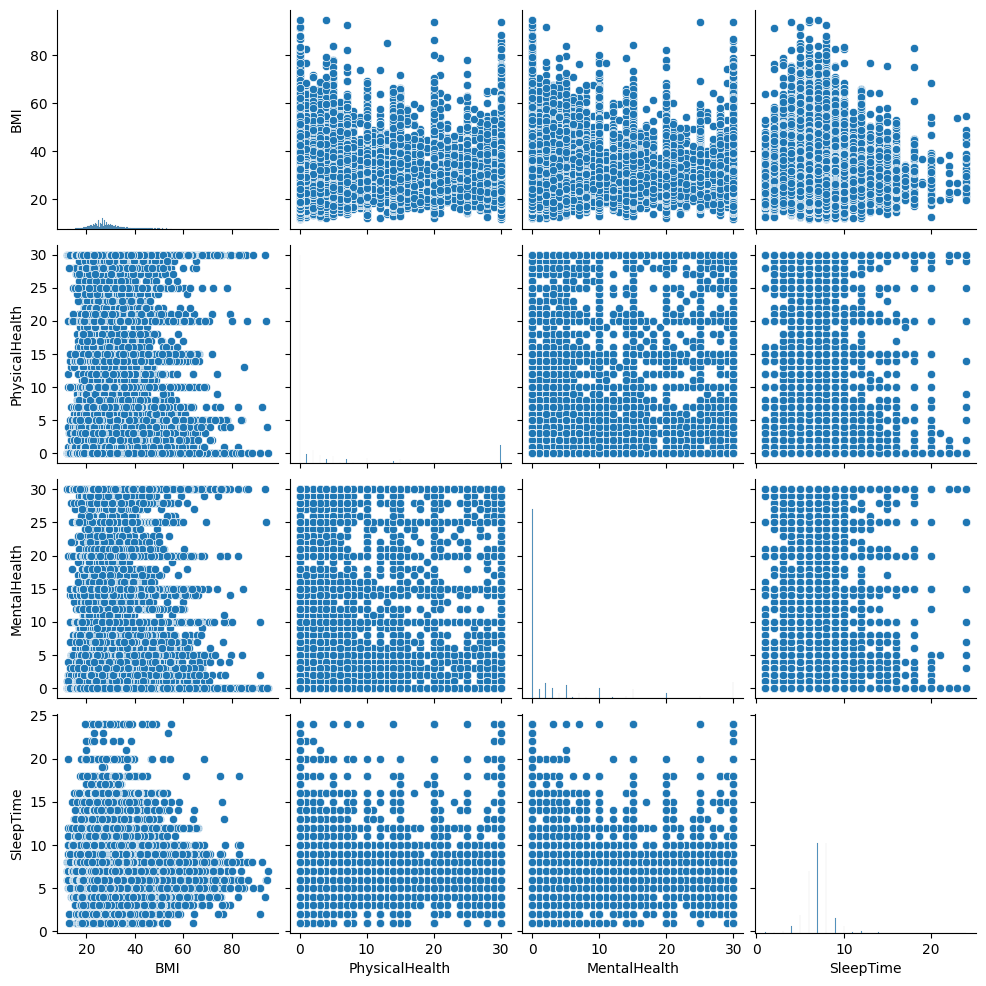

In [ ]:
sns.pairplot(df)
plt.show()